In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import img_as_uint
from scipy.signal import convolve2d

In [10]:
kernel_edgedetection = np.array([[-1, -1, -1],
                                 [-1, 8.5, -1],
                                 [-1, -1, -1]])

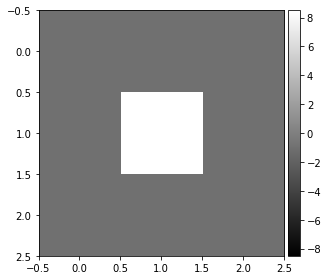

In [11]:
imshow(kernel_edgedetection, cmap = 'gray');

In [36]:
morph = imread('sample.png')

C:\Users\Harshit\AppData\Local\Temp/ipykernel_10824/3989837135.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  morph_gray = rgb2gray(morph)


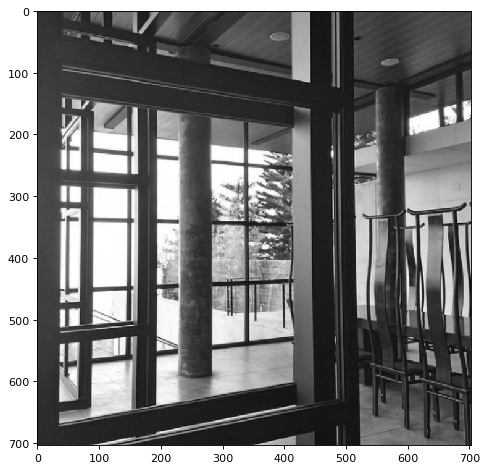

In [37]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
morph_gray = rgb2gray(morph)
imshow(morph_gray);

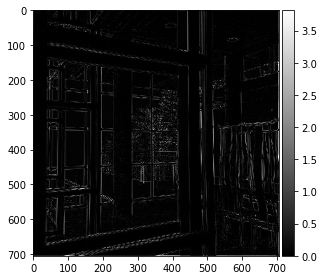

In [38]:
conv_im1 = convolve2d(morph_gray, kernel_edgedetection)
imshow(abs(conv_im1) , cmap='gray');

In [50]:
def edge_detector(image):
    f_size = 15
    morph_gray = rgb2gray(image)
    kernels = [np.array([[-1, -1, -1],
                         [-1, i, -1],
                        [-1, -1, -1]]) for i in range(2,10,1)]    
    
    titles = [f'Edge Detection Center {kernels[k][1][1]}' for k in
              range(len(kernels))]
    
    fig, ax = plt.subplots(2, 4, figsize=(17,12))
    
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'{titles[n]}', fontsize = f_size)
        ax.imshow(abs(convolve2d(morph_gray, kernels[n])) , 
                  cmap='gray')
        ax.set_axis_off()
        
fig.tight_layout()

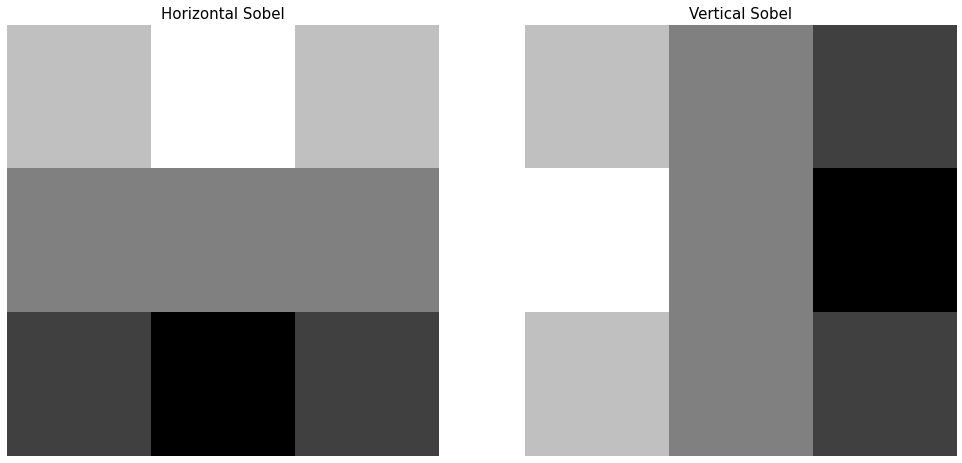

In [40]:
# Horizontal Sobel Filter
h_sobel = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Vertical Sobel Filter
v_sobel = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
fig, ax = plt.subplots(1, 2, figsize=(17,12))
ax[0].set_title(f'Horizontal Sobel', fontsize = 15)
ax[0].imshow(h_sobel, cmap='gray')
ax[0].set_axis_off()
ax[1].set_title(f'Vertical Sobel', fontsize = 15)
ax[1].imshow(v_sobel , cmap='gray')
ax[1].set_axis_off()

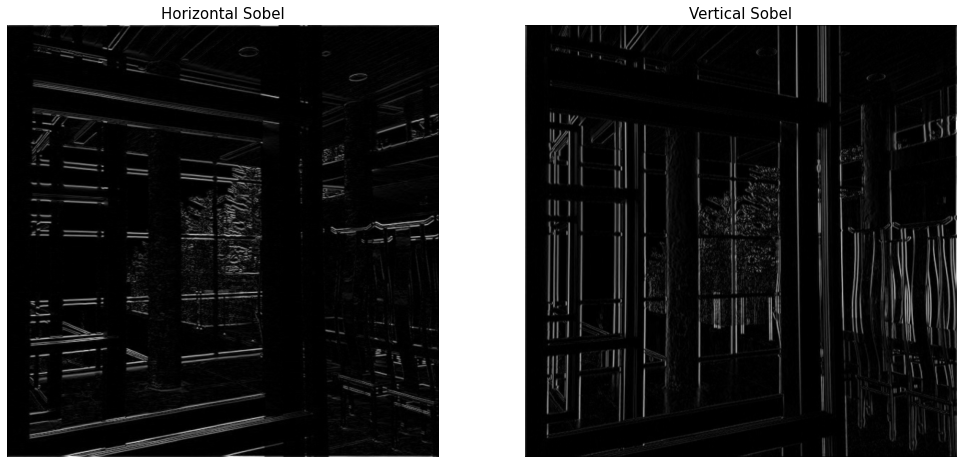

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(17,12))
ax[0].set_title(f'Horizontal Sobel', fontsize = 15)
ax[0].imshow(abs(convolve2d(morph_gray, h_sobel)), cmap='gray')
ax[0].set_axis_off()
ax[1].set_title(f'Vertical Sobel', fontsize = 15)
ax[1].imshow(abs(convolve2d(morph_gray, v_sobel)) , cmap='gray')
ax[1].set_axis_off()

In [43]:
dog = imread('dog.png')

C:\Users\Harshit\AppData\Local\Temp/ipykernel_10824/3009488277.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  graydog = rgb2gray(dog)


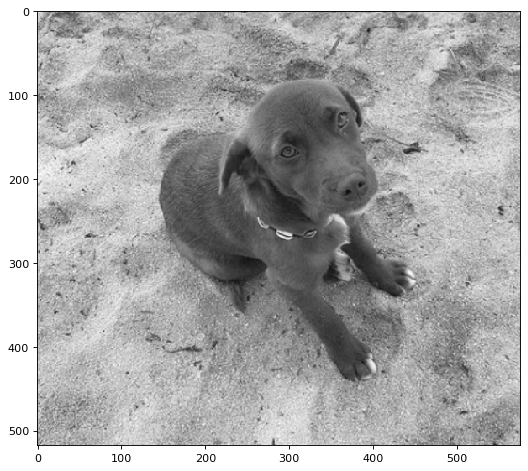

In [45]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
graydog = rgb2gray(dog)
imshow(graydog);

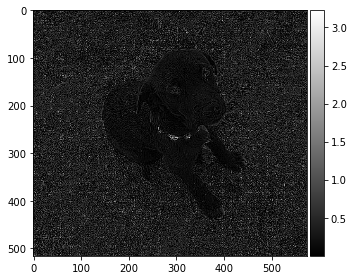

In [46]:
kernel_edgedetection = np.array([[-1, -1, -1],
                                 [-1, 8.5, -1],
                                 [-1, -1, -1]])
edge_dog = abs(convolve2d(graydog, kernel_edgedetection, 
               mode = 'valid'))
imshow(edge_dog, cmap='gray');

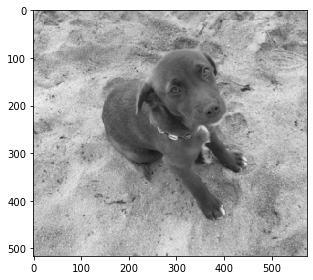

In [47]:
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])
blurred_dog = abs(convolve2d(graydog, blur, mode = 'valid' ))
imshow(blurred_dog , cmap='gray');

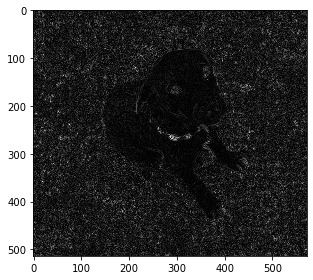

In [48]:
kernel_edgedetection = np.array([[-1, -1, -1],
                                 [-1, 8.05, -1],
                                 [-1, -1, -1]])
blurry_edge_dog = abs(convolve2d(blurred_dog, kernel_edgedetection, 
                      mode = 'valid'))
imshow( blurry_edge_dog , cmap='gray');

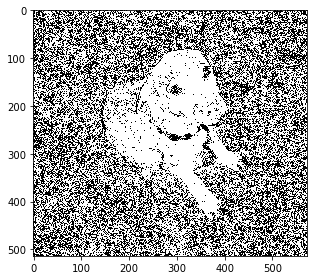

In [49]:
binary_dog = img_as_uint(blurry_edge_dog < np.mean(blurry_edge_dog))
imshow(binary_dog , cmap='gray');